In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lsa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
def load_preprocessAudio(aPath, label):
    audio , sr = lsa.load(aPath , sr = None)

    mfcc = lsa.feature.mfcc(y = audio , sr = sr , n_mfcc = 13)

    return mfcc.T , label

def prepareDataset(rPath , fPath):
    x , y = [] , []
    for p in rPath:
        feature, label = load_preprocessAudio(p , 0)
        x.append(feature)
        y.append(label)

    for p in fPath:
        feature, label = load_preprocessAudio(p , 1)
        x.append(feature)
        y.append(label)

    return np.array(x , dtype=object), np.array(y)


In [3]:
def augmentData(x , y):
    augX , augY = [] , []
    for features, label in zip(x , y):
        augX.append(features)
        augY.append(label)

        audioSig = lsa.effects.time_stretch(features.T[0], rate= 0.8)
        augX.append(lsa.feature.mfcc(y = audioSig, sr = 22050 , n_mfcc = 13).T)
        augY.append(label)

        audioShift = lsa.effects.pitch_shift(features.T[0], sr = 22050 , n_steps = 2)
        augX.append(lsa.feature.mfcc(y = audioShift, sr = 22050, n_mfcc = 13).T)
        augY.append(label)

    return np.array(augX , dtype=object), np.array(augY)


In [5]:
def createModel(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Masking(mask_value=0.),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(2, activation="softmax"),
    ])

    model.compile(Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [6]:
def train(model , xTrain , yTrain , xTest , yTest , epochs = 50 , batch_size = 32):
    history = model.fit(xTrain , yTrain , epochs=epochs, batch_size=batch_size , validation_split=0.2 , verbose=1)

    testLoss , testAcc = model.evaluate(xTest , yTest , verbose=0)

    print(f"Test Accuracy: { testAcc : .4f}")

    return history


In [7]:
def plotTrain(history):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'] , label = "training_accuracy")
    plt.plot(history.history['val_accuracy'], label = "validation_accuracy")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'] , label = "training_loss")
    plt.plot(history.history['val_loss'], label = "validation_loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [8]:
def plotConfusion(yTrue , yPredicted):
    cm = confusion_matrix(yTrue.argmax(axis=1) , yPredicted.argmax(axis=1))
    plt.figure(figsize=(8,6))

    sns.heatmap(cm , annot=True , fmt='g' , cmap = "Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [9]:
import os

In [10]:
base_path = r"..\dataset\User\Audio"

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\Abhirep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=85
  warnings.warn(
C:\Users\Abhirep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=106
  warnings.warn(
C:\Users\Abhirep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=85
  warnings.warn(
C:\Users\Abhirep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 909ms/step - accuracy: 0.5897 - loss: 0.6948 - val_accuracy: 0.6719 - val_loss: 0.6358
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 851ms/step - accuracy: 0.6462 - loss: 0.6546 - val_accuracy: 0.6719 - val_loss: 0.6237
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 864ms/step - accuracy: 0.6591 - loss: 0.6397 - val_accuracy: 0.6719 - val_loss: 0.6321
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 872ms/step - accuracy: 0.6482 - loss: 0.6419 - val_accuracy: 0.6719 - val_loss: 0.6229
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 893ms/step - accuracy: 0.6640 - loss: 0.6277 - val_accuracy: 0.6719 - val_loss: 0.6186
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 882ms/step - accuracy: 0.6630 - loss: 0.6265 - val_accuracy: 0.6719 - val_loss: 0.6228
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 885ms/step - accuracy: 0.6611 - loss: 0.6256 - val_accuracy: 0.6719 - val_loss: 0.6199
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 893ms/step - accuracy: 0.6700 - loss: 0.6070 - val_accu

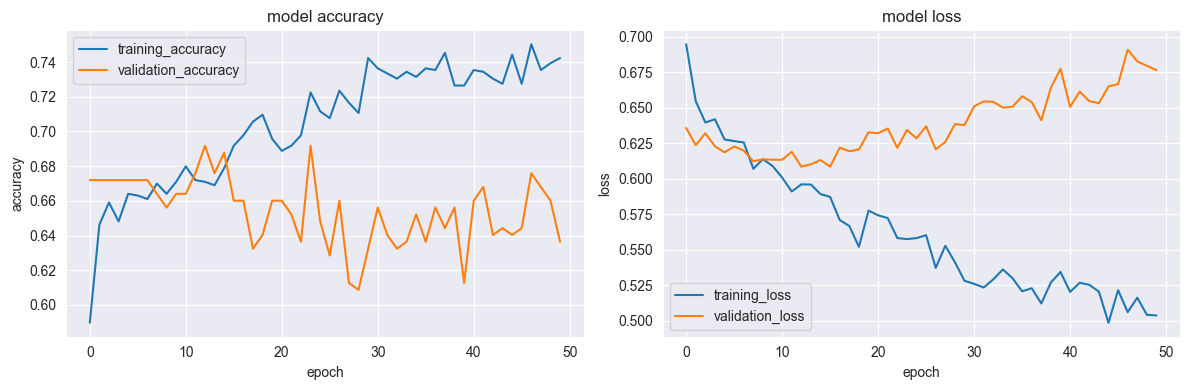

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step


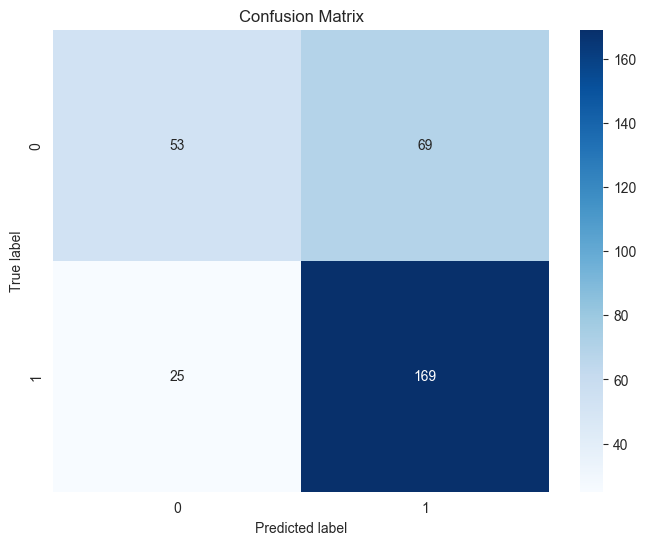

              precision    recall  f1-score   support

           0       0.68      0.43      0.53       122
           1       0.71      0.87      0.78       194

    accuracy                           0.70       316
   macro avg       0.69      0.65      0.66       316
weighted avg       0.70      0.70      0.68       316



In [12]:
real_paths = [os.path.join(base_path,"Real",f) for f in os.listdir(os.path.join(base_path,"Real")) if f.endswith(".mp3") or f.endswith(".wav")]
fake_paths = [os.path.join(base_path,"Fake",f) for f in os.listdir(os.path.join(base_path,"Fake")) if f.endswith(".mp3") or f.endswith(".wav")]

x , y = prepareDataset(real_paths , fake_paths)
xAug , yAug = augmentData(x , y)

maxLen = max(len(seq) for seq in xAug )
xPad = pad_sequences(xAug , maxlen=maxLen , dtype="float32" , padding="post" , truncating="post")

xTrain , xTest , yTrain , yTest = train_test_split(xPad , yAug , test_size = 0.2 , random_state = 42)

yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

model = createModel(input_shape = (xTrain .shape[1] , xTrain .shape[2] ))
history = train(model , xTrain , yTrain , xTest , yTest)

plotTrain(history)

yPred = model.predict(xTest)
plotConfusion(yTest, yPred)

print(classification_report(yTest.argmax(axis=1), yPred.argmax(axis=1)))



In [13]:
model.save(r"..\Models\audio_model.keras")